In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import special as sp

In [2]:
# beta=2.0
# Nc=2

In [3]:
# numer = 2.0 * sp.ive( 2, 2.0*beta/Nc )
# denom = sp.ive( 1, 2.0*beta/Nc )
# analytic = numer/denom
# print(analytic)

In [4]:
def get_matrix( Q, lam ):
    mat = np.matrix( [[sp.ive(k-ell+Q+lam[ell], beta/Nc) for ell in range(Nc)] for k in range(Nc)] )
    return mat

def cF( lam ):
    res = np.linalg.det( get_matrix(0, lam) )
    tmp = res
    for Q in range(1,400):
        res += np.linalg.det( get_matrix(Q, lam) )
        res += np.linalg.det( get_matrix(-Q, lam) )
        
        if abs(res-tmp)<1.0e-15:
            break        
        tmp = res
    return res

In [13]:
lam0 = np.zeros(Nc)
lamF = np.zeros(Nc)
lamF[0] = 1

analytic = cF( lamF )/cF( lam0 )
analytic

0.8662548534446245

In [2]:
trU = np.loadtxt( "wilson_su2.dat" )

In [3]:
trU.T[2]

array([0.01028126, 0.01056363, 0.01017503, 0.01025906, 0.01021802,
       0.01001417, 0.01009489, 0.01013556, 0.01024294, 0.00968285,
       0.00965594, 0.00958863, 0.00943631, 0.00921607, 0.00896502,
       0.00914297, 0.008548  , 0.0079519 , 0.00786144, 0.00711794,
       0.00722669, 0.00607676, 0.00571411])

In [14]:
def exact(beta):
    return 2.0 * sp.iv( 2, 2.0*beta/Nc ) / sp.iv( 1, 2.0*beta/Nc )

In [15]:
exact(2.0)

0.8662548534446235

In [9]:
xx = np.arange( 0.0, 4.0, 0.01 )

In [10]:
yy = np.array( [exact(beta) for beta in xx ] )
yy[0] = 0.0

/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_18300/3294618038.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return 2.0 * sp.iv( 2, beta ) / sp.iv( 1, beta )


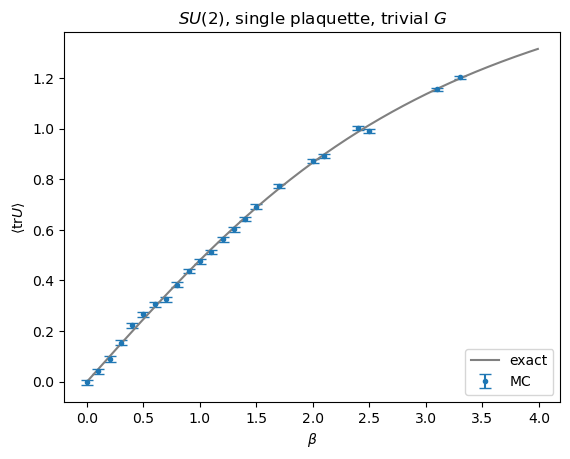

In [20]:
plt.errorbar( trU.T[0], trU.T[1], trU.T[2], 
             ls='none', marker='.',
            capsize=4.0, label="MC")
plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle {\\rm tr} U \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(2)$, single plaquette, trivial $G$")

plt.savefig("trU.pdf")

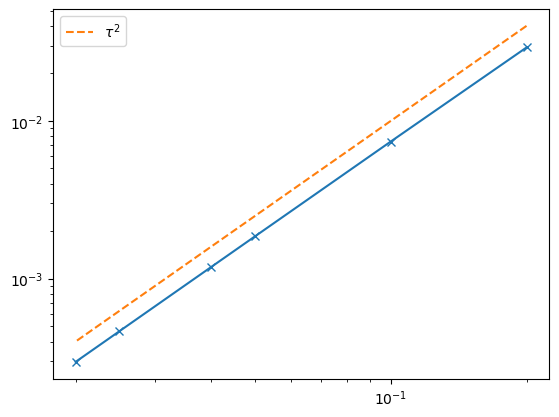

In [4]:
plt.plot( gauss.T[0], np.abs(gauss.T[1]), marker="x" )

plt.plot( gauss.T[0], gauss.T[0]**2, label='$\\tau^2$', ls='dashed' )

plt.xscale("log")
plt.yscale("log")

plt.legend()

In [5]:
phi = np.loadtxt( "phi.dat" )

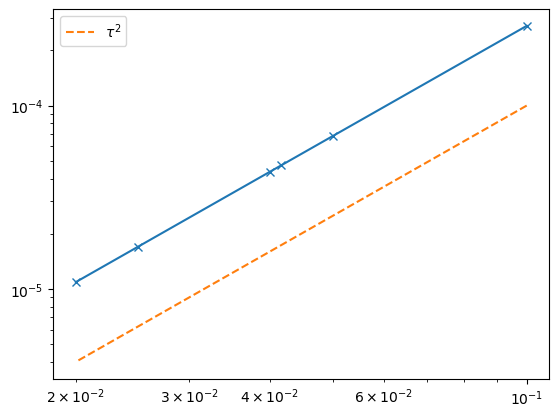

In [6]:
plt.plot( phi.T[0], np.abs(phi.T[1]), marker="x" )

plt.plot( phi.T[0], 0.01 * phi.T[0]**2, label='$\\tau^2$', ls='dashed' )

plt.xscale("log")
plt.yscale("log")

plt.legend()

In [7]:
wilson = np.loadtxt( "wilson.dat" )

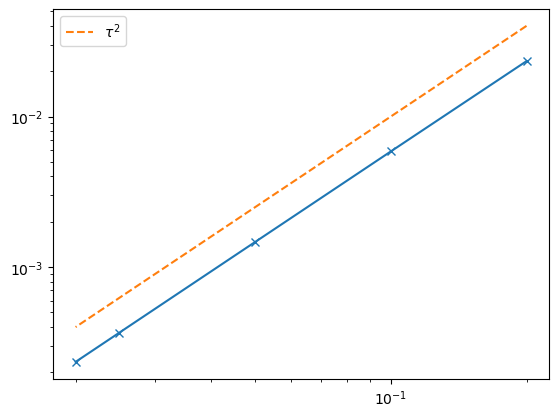

In [8]:
plt.plot( wilson.T[0], np.abs(wilson.T[1]), marker="x" )

plt.plot( wilson.T[0], wilson.T[0]**2, label='$\\tau^2$', ls='dashed' )

plt.xscale("log")
plt.yscale("log")

plt.legend()

In [9]:
theta = np.loadtxt( "theta.dat" )

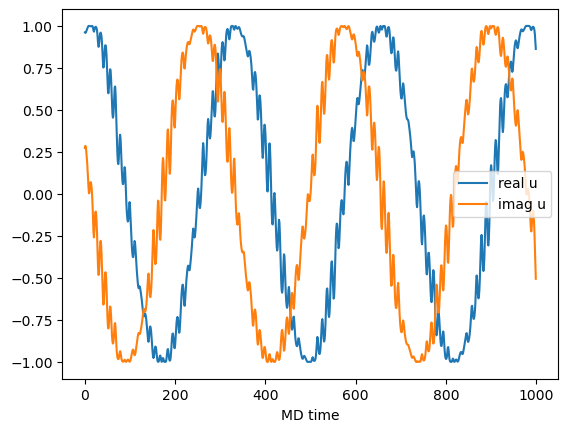

In [10]:
plt.plot( np.real( np.exp(1.0j*theta) ), label='real u' )
plt.plot( np.imag( np.exp(1.0j*theta) ), label='imag u' )

plt.xlabel("MD time")
plt.legend()